In [126]:
import networkx as nx
from matplotlib import pyplot as plt
import numpy as np
import math
from tqdm import tqdm
import cmath
import csv
from collections import Counter



#N = int(input("no. of nodes: "))

#lmd_steps  = int(input("no. of lamda steps:"))

enter 0 0:  0
enter 0 1:  1
enter 0 2:  0
enter 0 3:  0
enter 0 4:  0
enter 0 5:  1
enter 1 0:  1
enter 1 1:  0
enter 1 2:  1
enter 1 3:  0
enter 1 4:  0
enter 1 5:  0
enter 2 0:  0
enter 2 1:  1
enter 2 2:  0
enter 2 3:  1
enter 2 4:  0
enter 2 5:  0
enter 3 0:  0
enter 3 1:  0
enter 3 2:  1
enter 3 3:  0
enter 3 4:  1
enter 3 5:  0
enter 4 0:  0
enter 4 1:  0
enter 4 2:  0
enter 4 3:  1
enter 4 4:  0
enter 4 5:  1
enter 5 0:  1
enter 5 1:  0
enter 5 2:  0
enter 5 3:  0
enter 5 4:  1
enter 5 5:  0


[[0 1 0 0 0 1]
 [1 0 1 0 0 0]
 [0 1 0 1 0 0]
 [0 0 1 0 1 0]
 [0 0 0 1 0 1]
 [1 0 0 0 1 0]]
[2 2 2 2 2 2]


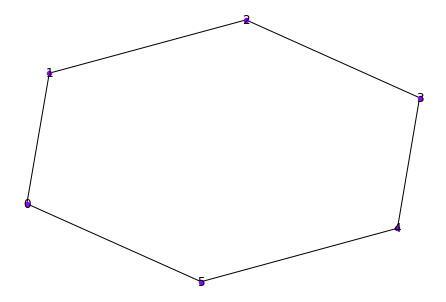

In [130]:
N = 6 #no of nodes
step = 10000


ring_matrix = [[ 0 for j in range(N)] for i in range(N)]
#print(ring_matrix)



ring_matrix = np.array(ring_matrix)

for i in range(N):
    for j in range(N):
        ring_matrix[i][j] = input('enter ' + str(i)+ " " + str(j)+ ": ")

degree = np.sum(ring_matrix[:,0:N],axis=1)
print(ring_matrix)
print(degree)

G = nx.from_numpy_matrix(ring_matrix)
nx.draw(G,node_color='#8F00FF',with_labels = True, node_size=20)



G = nx.scale_free_graph(N) #scale free directed network is created
G = G.to_undirected() # changed to undirected graph
G.pos = nx.spring_layout(G) #to give nodes spring like structure
    #nx.draw(G,node_color='#8F00FF', node_size=20) #to draw




In [114]:
#this one is for getting the answer with SINGLE IP


for node in G.nodes():
    G.nodes[node]['w'] = 0
    G.nodes[node]['theta'] = np.random.uniform(0,2*np.pi)
    G.nodes[node]['thetadot'] = 0


nextG = G.copy() #copy graph

#nx.draw(G,node_color='#8F00FF', node_size=20) #to draw

#extracting adjacency matrix
p = nx.adjacency_matrix(G).toarray()
#print(p)

#changing weighted matrix to unweighted
A = (p>=1).astype(int)
#print(A)
final_order = []

"""Kuramoto Oscillator function"""

def order(theta):
        z = sum(np.exp(theta*1j))/len(theta)
    #    print(np.absolute(z), np.angle(z))
        return np.absolute(z), np.angle(z)


    
def f(t0,theta, node,t):
    cpl = 0


    # sigma terms
    for j in range(N):
        cpl += A[node][j]*np.sin(theta[j]-theta[node])
            
    thetadot = nextG.nodes[node]['w'] - (1/degree[node])*cpl
    return thetadot

    # RK-4 method
def rk4(t0,y0,xn,n):

        # Calculating step size
    h = (xn-t0)/n

    time_series = []
#        print(n,N)
    for i in range(n):
    #        data = np.zeros(N)
        temp = np.array(y0)

        time_series.append(y0) 
    #        print(time_series)
        for node in G.nodes():

            k1 = h * (f(t0, y0, node, h))
            k2 = h * (f((t0+h/2), (y0+k1/2),node, h))
            k3 = h * (f((t0+h/2), (y0+k2/2),node, h))
            k4 = h * (f((t0+h), (y0+k3),node, h))
            k = (k1+2*k2+2*k3+k4)/6

            yn = y0[node] + k

            temp[node] = yn
            t0 = t0+h
    #            data[node] = yn
        y0 = temp
    time_series = np.array(time_series)
    return time_series

    # Inputs
t0 = 0
y0 = np.zeros(N)
for i in range(N):
    y0[i] = G.nodes[i]['theta']
xn = 100
    
    

    #data = np.array(rk4(t0,y0,xn,step))
data = rk4(t0,y0,xn,step)

    

ordr = []
angle = []

st_ep = []
for i in range(step):
    the_ta = data[i]
    x,y = order(the_ta)
    st_ep.append(i)
    ordr.append(x)
    angle.append(y)

    
oreder = order(data[-1])
  print(oreder)

print("Final Theta values after integration : ", data[-1])

f  = [[0.0 for i in range(N)] for j in range(N)]
f = np.array(f)

Frus = 0

for i in range(N):
    for j in range(N):
        f[i][j] = 1+math.cos(data[-1][j]- data[-1][i])
        f[i][j] = f[i][j]*ring_matrix[i][j]
        #print(f[i][j],i,j)
        Frus += f[i][j]
        
print("\nNode frustration matrix : \n",f)
Frus = Frus/(sum(degree))

print("\nFrus : ", Frus)
nx.draw(G,node_color='#8F00FF',with_labels = True, node_size=20)
print("Ring Matrix : ",ring_matrix)

[[0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]
 [1 1 1 0]]
(0.4999999999999999, 0.01180099029731255)


In [131]:
#this one calculates the no the IPs based Frus



#nx.draw(G,node_color='#8F00FF', node_size=20) #to draw

#extracting adjacency matrix
p = nx.adjacency_matrix(G).toarray()
#print(p)

#changing weighted matrix to unweighted
A = (p>=1).astype(int)
#print(A)
final_order = []

"""Kuramoto Oscillator function"""

def order(theta):
        z = sum(np.exp(theta*1j))/len(theta)
    #    print(np.absolute(z), np.angle(z))
        return np.absolute(z), np.angle(z)

FRUS = []
for IP in tqdm(range(100)): 
    for node in G.nodes():
        G.nodes[node]['w'] = 0
        G.nodes[node]['theta'] = np.random.uniform(0,2*np.pi)
        G.nodes[node]['thetadot'] = 0


    nextG = G.copy() #copy graph

    
    def f(t0,theta, node,t):
        cpl = 0


        # sigma terms
        for j in range(N):
            cpl += A[node][j]*np.sin(theta[j]-theta[node])

        thetadot = nextG.nodes[node]['w'] - (1/degree[node])*cpl
        return thetadot

        # RK-4 method
    def rk4(t0,y0,xn,n):

            # Calculating step size
        h = (xn-t0)/n

        time_series = []
    #        print(n,N)
        for i in range(n):
        #        data = np.zeros(N)
            temp = np.array(y0)

            time_series.append(y0) 
        #        print(time_series)
            for node in G.nodes():

                k1 = h * (f(t0, y0, node, h))
                k2 = h * (f((t0+h/2), (y0+k1/2),node, h))
                k3 = h * (f((t0+h/2), (y0+k2/2),node, h))
                k4 = h * (f((t0+h), (y0+k3),node, h))
                k = (k1+2*k2+2*k3+k4)/6

                yn = y0[node] + k

                temp[node] = yn
                t0 = t0+h
        #            data[node] = yn
            y0 = temp
        time_series = np.array(time_series)
        return time_series

        # Inputs
    t0 = 0
    y0 = np.zeros(N)
    for i in range(N):
        y0[i] = G.nodes[i]['theta']
    xn = 100



        #data = np.array(rk4(t0,y0,xn,step))
    data = rk4(t0,y0,xn,step)



    ordr = []
    angle = []

    st_ep = []
    for i in range(step):
        the_ta = data[i]
        x,y = order(the_ta)
        st_ep.append(i)
        ordr.append(x)
        angle.append(y)


    oreder = order(data[-1])
    print(oreder)

    print("Final Theta values after integration : ", data[-1])

    f  = [[0.0 for i in range(N)] for j in range(N)]
    f = np.array(f)

    Frus = 0

    for i in range(N):
        for j in range(N):
            f[i][j] = 1+math.cos(data[-1][j]- data[-1][i])
            f[i][j] = f[i][j]*ring_matrix[i][j]
            #print(f[i][j],i,j)
            Frus += f[i][j]

    #print("\nNode frustration matrix : \n",f)
    Frus = Frus/(sum(degree))
    FRUS.append(round(Frus,3))
    print("\nFrus : ", Frus)

  1%|          | 1/100 [00:08<13:39,  8.28s/it]

(6.417249413865106e-15, -1.1426177073616097)
Final Theta values after integration :  [3.56668562 0.42509296 3.56668562 0.42509296 3.56668562 6.70827827]

Frus :  0.0


  2%|▏         | 2/100 [00:16<13:25,  8.22s/it]

(3.703933931295863e-15, 0.7606682236612732)
Final Theta values after integration :  [5.47120726 2.3296146  5.47120726 2.3296146  5.47120726 2.3296146 ]

Frus :  0.0


  3%|▎         | 3/100 [00:24<13:17,  8.22s/it]

(3.597628941591053e-15, -2.1659314770058153)
Final Theta values after integration :  [2.54370611 5.68529876 2.54370611 5.68529876 2.54370611 5.68529876]

Frus :  0.0


  4%|▍         | 4/100 [00:32<13:06,  8.19s/it]

(3.614861087296627e-15, -0.5553437652606691)
Final Theta values after integration :  [4.15585263 7.29744528 4.15585263 1.01425997 4.15585263 1.01425997]

Frus :  0.0


  5%|▌         | 5/100 [00:41<13:08,  8.30s/it]

(7.391488069887265e-15, 2.534148055602145)
Final Theta values after integration :  [4.1054149  7.24700755 4.1054149  0.96382225 4.1054149  0.96382225]

Frus :  0.0


  6%|▌         | 6/100 [00:49<12:54,  8.23s/it]

(6.942642977758726e-15, -1.7206087833677939)
Final Theta values after integration :  [ 6.13580092  2.99420827 -0.14738439  2.99420827 -0.14738439  2.99420827]

Frus :  0.0


  7%|▋         | 7/100 [00:57<12:43,  8.21s/it]

(4.041272810440265e-16, 1.849095985800008)
Final Theta values after integration :  [6.55588001 3.41428736 6.55588001 3.41428736 0.2726947  3.41428736]

Frus :  0.0


  8%|▊         | 8/100 [01:05<12:31,  8.17s/it]

(3.69008843948893e-15, -0.7995816093887571)
Final Theta values after integration :  [3.9092599  0.76766724 3.9092599  0.76766724 3.9092599  7.05085255]

Frus :  0.0


  9%|▉         | 9/100 [01:13<12:24,  8.18s/it]

(7.390237273580575e-15, 1.09483131164266)
Final Theta values after integration :  [ 8.94791054  5.80631788  2.66472523 -0.47686743  2.66472523  5.80631788]

Frus :  0.0


 10%|█         | 10/100 [01:22<12:20,  8.23s/it]

(1.9018589930202667e-15, 0.3786996943445861)
Final Theta values after integration :  [1.95043669 5.09202934 1.95043669 5.09202934 1.95043669 5.09202934]

Frus :  0.0


 11%|█         | 11/100 [01:30<12:10,  8.21s/it]

(3.729589311216769e-15, 1.3149877621795247)
Final Theta values after integration :  [6.03013228 2.88853963 6.03013228 2.88853963 6.03013228 2.88853963]

Frus :  0.0


 12%|█▏        | 12/100 [01:38<11:59,  8.17s/it]

(1.755026598327473e-15, 2.7062393784374907)
Final Theta values after integration :  [4.27745041 1.13585775 4.27745041 1.13585775 4.27745041 1.13585775]

Frus :  0.0


 13%|█▎        | 13/100 [01:46<11:50,  8.16s/it]

(8.790726310007474e-16, 2.430683280406227)
Final Theta values after integration :  [0.85815702 3.99974967 0.85815702 3.99974967 0.85815702 3.99974967]

Frus :  0.0


 14%|█▍        | 14/100 [01:54<11:40,  8.14s/it]

(2.7469072213695403e-16, -1.2317372480675732)
Final Theta values after integration :  [2.67403901 6.86282922 4.76843412 2.67403901 0.57964391 4.76843412]

Frus :  0.49999999999999983


 15%|█▌        | 15/100 [02:02<11:31,  8.13s/it]

(3.722191832172233e-15, 0.8875152195305854)
Final Theta values after integration :  [ 5.60172378  2.46013113  5.60172378  2.46013113 -0.68146153  2.46013113]

Frus :  0.0


 16%|█▌        | 16/100 [02:10<11:21,  8.12s/it]

(3.699228113354598e-15, -1.7264880493019268)
Final Theta values after integration :  [ 2.98573865  6.12733131  2.98573865  6.12733131  2.98573865 -0.155854  ]

Frus :  0.0


 17%|█▋        | 17/100 [02:19<11:13,  8.12s/it]

(3.695744034943632e-15, -0.9633517288072486)
Final Theta values after integration :  [3.74925053 0.60765788 3.74925053 6.89084319 3.74925053 6.89084319]

Frus :  0.0


 18%|█▊        | 18/100 [02:27<11:06,  8.12s/it]

(1.3343220141622404e-16, 0.5880026035475675)
Final Theta values after integration :  [5.76452631 1.57573611 3.67013121 5.76452631 1.57573611 3.67013121]

Frus :  0.49999999999999994


 19%|█▉        | 19/100 [02:35<10:57,  8.11s/it]

(2.47260138565626e-16, 1.8747972661350412)
Final Theta values after integration :  [3.36227139 0.22067874 3.36227139 0.22067874 3.36227139 0.22067874]

Frus :  0.0


 20%|██        | 20/100 [02:43<10:48,  8.10s/it]

(6.486450243303835e-15, -1.153730577435872)
Final Theta values after integration :  [3.5588424  0.41724974 3.5588424  0.41724974 3.5588424  6.70043505]

Frus :  0.0


 21%|██        | 21/100 [02:51<10:39,  8.10s/it]

(3.703344586478221e-15, -0.19102621923121757)
Final Theta values after integration :  [1.37295605 4.5145487  7.65614136 4.5145487  1.37295605 4.5145487 ]

Frus :  0.0


 22%|██▏       | 22/100 [02:59<10:32,  8.11s/it]

(7.316553176037045e-15, 0.9343765361548272)
Final Theta values after integration :  [2.50131337 5.64290602 8.78449867 5.64290602 2.50131337 5.64290602]

Frus :  0.0


 23%|██▎       | 23/100 [03:07<10:25,  8.12s/it]

(5.4672143489065705e-16, -1.1525719972156676)
Final Theta values after integration :  [0.43061829 3.57221094 0.43061829 3.57221094 0.43061829 3.57221094]

Frus :  0.0


 24%|██▍       | 24/100 [03:16<10:36,  8.38s/it]

(5.525211158582564e-15, -0.9279650102658181)
Final Theta values after integration :  [6.92538429 3.78379163 0.64219898 3.78379163 0.64219898 3.78379163]

Frus :  0.0


 25%|██▌       | 25/100 [03:24<10:23,  8.32s/it]

(2.0687784610393942e-17, -1.1071487177940904)
Final Theta values after integration :  [-0.18709757  4.00169263  1.90729753 -0.18709757  4.00169263  1.90729753]

Frus :  0.5


 26%|██▌       | 26/100 [03:34<10:34,  8.58s/it]

(3.676097664644334e-15, -2.5242688467959677)
Final Theta values after integration :  [ 5.33086938  2.18927672  5.33086938  2.18927672 -0.95231593  2.18927672]

Frus :  0.0


 27%|██▋       | 27/100 [03:42<10:32,  8.66s/it]

(6.426546327251057e-15, -1.9700170963701493)
Final Theta values after integration :  [ 2.74381834 -0.39777431  2.74381834 -0.39777431  2.74381834  5.885411  ]

Frus :  0.0


 28%|██▊       | 28/100 [03:54<11:26,  9.54s/it]

(3.686073997948886e-15, -1.686512059322443)
Final Theta values after integration :  [-0.11635559  3.02523707  6.16682972  3.02523707  6.16682972  3.02523707]

Frus :  0.0


 29%|██▉       | 29/100 [04:03<11:13,  9.49s/it]

(8.981929940064155e-17, 1.3633001003596938)
Final Theta values after integration :  [ 6.16397829  3.02238563  6.16397829  3.02238563 -0.11920702  3.02238563]

Frus :  0.0


 30%|███       | 30/100 [04:13<11:07,  9.54s/it]

(6.10342239802965e-16, -1.3258176636680326)
Final Theta values after integration :  [ 4.13940829  6.23380339  2.04501319  4.13940829 -0.04938192  2.04501319]

Frus :  0.5


 31%|███       | 31/100 [04:22<10:55,  9.50s/it]

(9.142034778853354e-16, 2.198104519070659)
Final Theta values after integration :  [0.59585854 3.7374512  0.59585854 3.7374512  0.59585854 3.7374512 ]

Frus :  0.0


 32%|███▏      | 32/100 [04:31<10:36,  9.36s/it]

(3.566480466578205e-15, -0.3274929030916143)
Final Theta values after integration :  [ 4.38237595  1.2407833  -1.90080936  1.2407833   4.38237595  7.5239686 ]

Frus :  0.0


 33%|███▎      | 33/100 [04:41<10:22,  9.29s/it]

(9.435081445006126e-17, 2.9441970937399127)
Final Theta values after integration :  [2.43242251 6.62121271 4.52681761 2.43242251 6.62121271 4.52681761]

Frus :  0.5


 34%|███▍      | 34/100 [04:49<10:06,  9.18s/it]

(2.7755575615628914e-17, 1.5707963267948966)
Final Theta values after integration :  [6.59809924 3.45650659 6.59809924 3.45650659 0.31491394 3.45650659]

Frus :  0.0


 35%|███▌      | 35/100 [04:58<09:37,  8.89s/it]

(1.7657239282686504e-15, -3.0471377181947465)
Final Theta values after integration :  [4.79480552 1.65321287 4.79480552 1.65321287 4.79480552 1.65321287]

Frus :  0.0


 36%|███▌      | 36/100 [05:06<09:15,  8.68s/it]

(3.592593285973112e-15, -0.1655720474147338)
Final Theta values after integration :  [4.54764073 1.40604807 4.54764073 1.40604807 4.54764073 7.68923338]

Frus :  0.0


 37%|███▋      | 37/100 [05:14<08:57,  8.53s/it]

(4.330423290659063e-15, 1.8790341901782106)
Final Theta values after integration :  [0.30568261 3.44727527 0.30568261 3.44727527 6.58886792 3.44727527]

Frus :  0.0


 38%|███▊      | 38/100 [05:22<08:42,  8.43s/it]

(5.551115123125783e-17, -1.5707963267948966)
Final Theta values after integration :  [ 6.21387689  3.07228424 -0.06930842  3.07228424  6.21387689  3.07228424]

Frus :  0.0


 39%|███▉      | 39/100 [05:30<08:29,  8.36s/it]

(4.505949562318948e-16, 1.9055331641117113)
Final Theta values after integration :  [6.61310827 3.47151562 0.32992297 3.47151562 6.61310827 3.47151562]

Frus :  0.0


 40%|████      | 40/100 [05:39<08:18,  8.31s/it]

(5.522328884191712e-15, -0.9930164154574267)
Final Theta values after integration :  [3.72026329 0.57867064 3.72026329 6.86185594 3.72026329 0.57867064]

Frus :  0.0


 41%|████      | 41/100 [05:47<08:09,  8.30s/it]

(9.251858538542972e-17, 0.6435011087932844)
Final Theta values after integration :  [ 2.0339004  6.2226906  4.1282955  2.0339004 -0.0604947  4.1282955]

Frus :  0.5


 42%|████▏     | 42/100 [05:55<08:00,  8.28s/it]

(3.644245892006059e-15, -2.5366902506543805)
Final Theta values after integration :  [ 5.31401679  2.17242414 -0.96916851  2.17242414 -0.96916851  2.17242414]

Frus :  0.0


 43%|████▎     | 43/100 [06:03<07:49,  8.24s/it]

(7.345765936742709e-16, -2.2848870254070546)
Final Theta values after integration :  [ 1.28405453 -0.81034058  3.37844963  1.28405453  5.47284473  3.37844963]

Frus :  0.49999999999999983


 44%|████▍     | 44/100 [06:12<07:41,  8.24s/it]

(1.8371186636550162e-15, 3.0508187802958453)
Final Theta values after integration :  [ 1.49164231 -1.64995035  1.49164231  4.63323496  1.49164231  4.63323496]

Frus :  0.0


 45%|████▌     | 45/100 [06:20<07:33,  8.24s/it]

(2.1427504611553257e-15, -1.985184638363995)
Final Theta values after integration :  [-0.40350495  3.78528525  7.97407546  5.87968035  3.78528525  1.69089015]

Frus :  0.5000000000000001


 46%|████▌     | 46/100 [06:28<07:24,  8.23s/it]

(5.327656852308245e-16, 1.2160906747839564)
Final Theta values after integration :  [ 5.91717446  2.77558181  5.91717446  2.77558181 -0.36601085  2.77558181]

Frus :  0.0


 47%|████▋     | 47/100 [06:36<07:15,  8.22s/it]

(3.6969511015471164e-15, -1.3692290120051804)
Final Theta values after integration :  [3.33751281 6.47910546 3.33751281 0.19592015 3.33751281 6.47910546]

Frus :  0.0


 48%|████▊     | 48/100 [06:44<07:07,  8.22s/it]

(7.40195519135414e-15, 0.4060406451264239)
Final Theta values after integration :  [5.11850033 1.97690767 5.11850033 8.26009298 5.11850033 1.97690767]

Frus :  0.0


 49%|████▉     | 49/100 [06:53<06:58,  8.20s/it]

(7.291615049437683e-15, -0.6612657372868069)
Final Theta values after integration :  [4.04874586 0.9071532  4.04874586 7.19033851 4.04874586 0.9071532 ]

Frus :  0.0


 50%|█████     | 50/100 [07:01<06:50,  8.21s/it]

(7.089055489790401e-15, -1.6727700203305975)
Final Theta values after integration :  [-0.10099302  3.04059964 -0.10099302  3.04059964  6.18219229  3.04059964]

Frus :  0.0


 51%|█████     | 51/100 [07:09<06:41,  8.19s/it]

(9.340254099135682e-16, -0.9827937232473292)
Final Theta values after integration :  [0.58536609 3.72695874 0.58536609 3.72695874 0.58536609 3.72695874]

Frus :  0.0


 52%|█████▏    | 52/100 [07:17<06:33,  8.20s/it]

(3.8146389987685307e-16, 1.3258176636680326)
Final Theta values after integration :  [ 2.86719215  6.0087848   2.86719215 -0.2744005   2.86719215  6.0087848 ]

Frus :  0.0


 53%|█████▎    | 53/100 [07:25<06:24,  8.18s/it]

(3.6748400749244125e-15, -2.4990985938014947)
Final Theta values after integration :  [ 5.34220793  2.20061527  5.34220793  2.20061527 -0.94097738  2.20061527]

Frus :  0.0


 54%|█████▍    | 54/100 [07:34<06:16,  8.18s/it]

(7.286101464627044e-15, 0.2884161811288596)
Final Theta values after integration :  [8.14121951 4.99962686 1.8580342  4.99962686 1.8580342  4.99962686]

Frus :  0.0


 55%|█████▌    | 55/100 [07:42<06:07,  8.18s/it]

(1.7523909087597557e-15, -2.7630470582783)
Final Theta values after integration :  [5.08285784 1.94126518 5.08285784 1.94126518 5.08285784 1.94126518]

Frus :  0.0


 56%|█████▌    | 56/100 [07:50<06:00,  8.19s/it]

(7.088157013686101e-15, -1.5054871161199492)
Final Theta values after integration :  [3.20506979 6.34666245 3.20506979 0.06347714 3.20506979 0.06347714]

Frus :  0.0


 57%|█████▋    | 57/100 [07:59<05:59,  8.35s/it]

(3.814638998768531e-17, -1.8157749899217608)
Final Theta values after integration :  [0.39331295 2.48770805 4.58210316 0.39331295 2.48770805 4.58210316]

Frus :  0.5000000000000001


 58%|█████▊    | 58/100 [08:07<05:57,  8.50s/it]

(3.665838073340989e-15, 2.129395642138459)
Final Theta values after integration :  [0.55526439 3.69685704 0.55526439 3.69685704 6.8384497  3.69685704]

Frus :  0.0


 59%|█████▉    | 59/100 [08:16<05:44,  8.41s/it]

(3.762447750557909e-15, 2.1778961990993615)
Final Theta values after integration :  [3.74640884 6.88800149 3.74640884 0.60481618 3.74640884 6.88800149]

Frus :  0.0


 60%|██████    | 60/100 [08:24<05:33,  8.33s/it]

(3.684419080674786e-15, -1.641164530741806)
Final Theta values after integration :  [ 3.07421656  6.21580921  3.07421656  6.21580921  3.07421656 -0.0673761 ]

Frus :  0.0


 61%|██████    | 61/100 [08:32<05:22,  8.26s/it]

(3.671810777505016e-15, -1.0191413442663497)
Final Theta values after integration :  [0.55870051 3.70029316 0.55870051 3.70029316 6.84188581 3.70029316]

Frus :  0.0


 62%|██████▏   | 62/100 [08:40<05:12,  8.23s/it]

(6.48357282031894e-15, -1.9725028137535392)
Final Theta values after integration :  [ 2.73757435  5.879167    2.73757435 -0.4040183   2.73757435 -0.4040183 ]

Frus :  0.0


 63%|██████▎   | 63/100 [08:48<05:03,  8.20s/it]

(6.415268331448509e-15, -1.1833270198973367)
Final Theta values after integration :  [3.53040759 0.38881494 3.53040759 0.38881494 3.53040759 6.67200025]

Frus :  0.0


 64%|██████▍   | 64/100 [08:56<04:54,  8.18s/it]

(1.8366512180639655e-15, 2.770440540578559)
Final Theta values after integration :  [4.35375271 1.21216006 4.35375271 1.21216006 4.35375271 1.21216006]

Frus :  0.0


 65%|██████▌   | 65/100 [09:04<04:45,  8.16s/it]

(1.859600551531243e-16, -1.6704649792860586)
Final Theta values after integration :  [ 7.39505884  3.20626864 -0.98252157  1.11187354  3.20626864  5.30066374]

Frus :  0.5


 66%|██████▌   | 66/100 [09:13<04:36,  8.14s/it]

(1.853907166044258e-15, -2.774060525268812)
Final Theta values after integration :  [ 5.0892155   1.94762284 -1.19396981  1.94762284  5.0892155   1.94762284]

Frus :  0.0


 67%|██████▋   | 67/100 [09:21<04:28,  8.13s/it]

(2.1454738786505673e-15, 0.2617135024012051)
Final Theta values after integration :  [ 1.83503249  4.97662514  1.83503249 -1.30656017  8.11821779  4.97662514]

Frus :  0.0


 68%|██████▊   | 68/100 [09:29<04:19,  8.11s/it]

(4.471625282496328e-16, 1.9974238199217726)
Final Theta values after integration :  [3.60647098 6.74806363 3.60647098 6.74806363 3.60647098 0.46487832]

Frus :  0.0


 69%|██████▉   | 69/100 [09:37<04:11,  8.11s/it]

(9.158872675655353e-16, -0.7853981633974483)
Final Theta values after integration :  [0.79424379 3.93583644 0.79424379 3.93583644 0.79424379 3.93583644]

Frus :  0.0


 70%|███████   | 70/100 [09:45<04:03,  8.11s/it]

(6.936551246265248e-15, -1.6482331455918655)
Final Theta values after integration :  [ 3.06112728  6.20271994  3.06112728 -0.08046537  3.06112728 -0.08046537]

Frus :  0.0


 71%|███████   | 71/100 [09:53<03:55,  8.12s/it]

(3.658276588018522e-15, 2.0152155366959956)
Final Theta values after integration :  [0.44616276 3.58775541 0.44616276 3.58775541 6.72934806 3.58775541]

Frus :  0.0


 72%|███████▏  | 72/100 [10:01<03:47,  8.11s/it]

(3.686142936711488e-15, -1.0622351223243012)
Final Theta values after integration :  [3.65102043 0.50942778 3.65102043 0.50942778 3.65102043 6.79261309]

Frus :  0.0


 73%|███████▎  | 73/100 [10:09<03:38,  8.10s/it]

(9.31272061848296e-16, -0.8557046275160727)
Final Theta values after integration :  [0.71120634 3.85279899 0.71120634 3.85279899 0.71120634 3.85279899]

Frus :  0.0


 74%|███████▍  | 74/100 [10:17<03:30,  8.10s/it]

(1.8862052874134726e-15, -0.20749622643520266)
Final Theta values after integration :  [4.50422534 1.36263269 4.50422534 1.36263269 4.50422534 1.36263269]

Frus :  0.0


 75%|███████▌  | 75/100 [10:25<03:22,  8.09s/it]

(1.8728330450731676e-15, 3.022752309022028)
Final Theta values after integration :  [ 1.44453     4.58612265  1.44453    -1.69706266  1.44453     4.58612265]

Frus :  0.0


 76%|███████▌  | 76/100 [10:34<03:14,  8.10s/it]

(9.192455943384781e-16, 2.4416997838705496)
Final Theta values after integration :  [0.85584288 3.99743553 0.85584288 3.99743553 0.85584288 3.99743553]

Frus :  0.0


 77%|███████▋  | 77/100 [10:42<03:06,  8.09s/it]

(6.291944053149221e-17, -0.2984989315861793)
Final Theta values after integration :  [0.34262776 2.43702287 4.53141797 0.34262776 2.43702287 4.53141797]

Frus :  0.5000000000000001


 78%|███████▊  | 78/100 [10:50<02:58,  8.10s/it]

(3.601053443738612e-15, -2.5093963047192416)
Final Theta values after integration :  [-0.93630806  2.2052846   5.34687725  2.2052846  -0.93630806  2.2052846 ]

Frus :  0.0


 79%|███████▉  | 79/100 [10:58<02:50,  8.12s/it]

(1.8734099754458624e-15, -2.942744310258353)
Final Theta values after integration :  [ 1.76871617  4.91030883  1.76871617 -1.37287648  1.76871617  4.91030883]

Frus :  0.0


 80%|████████  | 80/100 [11:06<02:42,  8.12s/it]

(2.8721321588324255e-15, -2.4245808337828483)
Final Theta values after integration :  [ 2.28098203 -0.86061062  8.56416734  5.42257468  2.28098203 -0.86061062]

Frus :  0.0


 81%|████████  | 81/100 [11:14<02:34,  8.13s/it]

(6.413246596529851e-15, -1.1039229225314693)
Final Theta values after integration :  [3.61047297 0.46888032 3.61047297 0.46888032 3.61047297 6.75206563]

Frus :  0.0


 82%|████████▏ | 82/100 [11:22<02:26,  8.16s/it]

(3.6425190979732294e-15, 1.135550169632651)
Final Theta values after integration :  [ 2.70213738 -0.43945528  2.70213738 -0.43945528  2.70213738  5.84373003]

Frus :  0.0


 83%|████████▎ | 83/100 [11:31<02:18,  8.16s/it]

(2.4043726989535737e-16, 0.3936811395802743)
Final Theta values after integration :  [5.24595203 1.05716182 3.15155693 5.24595203 7.34034713 3.15155693]

Frus :  0.49999999999999994


 84%|████████▍ | 84/100 [11:39<02:10,  8.13s/it]

(9.162610228422905e-16, -2.327630832353585)
Final Theta values after integration :  [-0.79029417  2.35129849  5.49289114  2.35129849  5.49289114  2.35129849]

Frus :  0.0


 85%|████████▌ | 85/100 [11:47<02:01,  8.12s/it]

(3.05320092875892e-17, 2.2218730482393765)
Final Theta values after integration :  [0.02990073 3.17149338 0.02990073 3.17149338 0.02990073 3.17149338]

Frus :  0.0


 86%|████████▌ | 86/100 [11:55<01:53,  8.13s/it]

(3.700743415417188e-17, 0.0)
Final Theta values after integration :  [3.90671851 6.00111361 1.81232341 3.90671851 6.00111361 1.81232341]

Frus :  0.5


 87%|████████▋ | 87/100 [12:03<01:45,  8.12s/it]

(5.470657672246864e-15, -0.6847775835403227)
Final Theta values after integration :  [4.02891257 0.88731992 4.02891257 7.17050522 4.02891257 0.88731992]

Frus :  0.0


 88%|████████▊ | 88/100 [12:11<01:37,  8.12s/it]

(3.611023025300749e-15, -1.9931829632422235)
Final Theta values after integration :  [2.71683128 5.85842393 2.71683128 5.85842393 2.71683128 5.85842393]

Frus :  0.0


 89%|████████▉ | 89/100 [12:19<01:29,  8.13s/it]

(5.485220867312013e-15, -2.198104519070659)
Final Theta values after integration :  [ 2.52034406 -0.6212486   2.52034406 -0.6212486   2.52034406  5.66193671]

Frus :  0.0


 90%|█████████ | 90/100 [12:27<01:21,  8.12s/it]

(3.600054967108512e-15, -2.3234788944096483)
Final Theta values after integration :  [2.38894636 5.53053902 2.38894636 5.53053902 2.38894636 5.53053902]

Frus :  0.0


 91%|█████████ | 91/100 [12:35<01:13,  8.11s/it]

(1.878377932716794e-15, -0.3310960767041321)
Final Theta values after integration :  [ 4.3764161   7.51800876  4.3764161   1.23482345 -1.9067692   1.23482345]

Frus :  0.0


 92%|█████████▏| 92/100 [12:44<01:04,  8.11s/it]

(4.35852885653299e-15, -1.4388058829510546)
Final Theta values after integration :  [0.13350818 3.27510083 0.13350818 3.27510083 6.41669349 3.27510083]

Frus :  0.0


 93%|█████████▎| 93/100 [12:52<00:56,  8.10s/it]

(7.369034179801198e-16, 0.8921338360465839)
Final Theta values after integration :  [ 2.45248324 -0.68910941  2.45248324  5.5940759   2.45248324  5.5940759 ]

Frus :  0.0


 94%|█████████▍| 94/100 [13:00<00:48,  8.12s/it]

(1.8425895641932417e-15, 2.949613091989701)
Final Theta values after integration :  [ 1.3891878   4.53078045  1.3891878  -1.75240486  1.3891878   4.53078045]

Frus :  0.0


 95%|█████████▌| 95/100 [13:08<00:40,  8.11s/it]

(1.7745247976617118e-15, 2.9421521068155583)
Final Theta values after integration :  [4.50854952 1.36695687 4.50854952 1.36695687 4.50854952 1.36695687]

Frus :  0.0


 96%|█████████▌| 96/100 [13:16<00:32,  8.12s/it]

(3.683355331369465e-15, -2.056912064381528)
Final Theta values after integration :  [-0.48557432  2.65601834  5.79761099  2.65601834  5.79761099  2.65601834]

Frus :  0.0


 97%|█████████▋| 97/100 [13:24<00:24,  8.13s/it]

(1.7745247976617118e-15, 2.9421521068155583)
Final Theta values after integration :  [1.38422148 4.52581414 1.38422148 4.52581414 1.38422148 4.52581414]

Frus :  0.0


 98%|█████████▊| 98/100 [13:32<00:16,  8.13s/it]

(1.6703640650036124e-15, 2.458201408102457)
Final Theta values after integration :  [4.92321421 2.82881911 0.73442401 4.92321421 2.82881911 7.01760932]

Frus :  0.5000000000000001


 99%|█████████▉| 99/100 [13:40<00:08,  8.11s/it]

(9.192921513844874e-16, 2.0749622882740497)
Final Theta values after integration :  [3.65546125 0.5138686  3.65546125 0.5138686  3.65546125 0.5138686 ]

Frus :  0.0


100%|██████████| 100/100 [13:48<00:00,  8.29s/it]

(9.298002757656214e-16, -1.0269638704927742)
Final Theta values after integration :  [3.68624483 0.54465218 3.68624483 0.54465218 3.68624483 0.54465218]

Frus :  0.0


For 100 IPs of a 6-node network, we got 2-states :  Counter({0.0: 86, 0.5: 14})
Ring Matrix : 
 [[0 1 0 0 0 1]
 [1 0 1 0 0 0]
 [0 1 0 1 0 0]
 [0 0 1 0 1 0]
 [0 0 0 1 0 1]
 [1 0 0 0 1 0]]


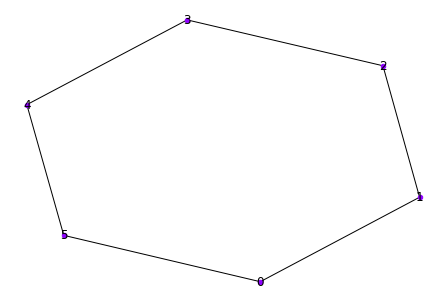

In [137]:
#print(FRUS)

c = Counter(FRUS)
print("For 100 IPs of a 6-node network, we got 2-states : ",c)

nx.draw(G,node_color='#8F00FF',with_labels = True, node_size=20)
print("Ring Matrix : \n",ring_matrix)